# <span style="Algerian:cursive;font-size:55px;color:purple;"> Heart Failure Prediction

***Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.***

***People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.***

Dataset Link : https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction


# <span style="Algerian:cursive;font-size:25px;color:red;">Objective</span>

***1. To find which factors affects the Heart Disease.***

***2. To find a high performance predictive model that classifies the patient have a heart disease or not.***


# <span style="Algerian:cursive;font-size:25px;color:red;"> Attribute Information
1. ***Age:*** Age of the patient [years]
2. ***Sex:*** Sex of the patient [M: Male, F: Female]
3. ***ChestPainType:*** Chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4. ***RestingBP:*** Resting blood pressure [mm Hg]
5. ***Cholesterol:*** Serum cholesterol [mm/dl]
6. ***FastingBS:*** Fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7. ***RestingECG:*** Resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8. ***MaxHR:*** Maximum heart rate achieved [Numeric value between 60 and 202]
9. ***ExerciseAngina:*** Exercise-induced angina [Y: Yes, N: No]
10. ***Oldpeak:*** Oldpeak = ST [Numeric value measured in depression]
11. ***ST_Slope:*** The slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12. ***HeartDisease:*** Output class [1: Heart Disease, 0: Normal]

# <span style="Algerian:cursive;font-size:25px;color:red;"> Import Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
h=pd.read_csv("C:\\Users\\LENOVO\\Kalyani\\Documents\\Datasets\\Heart_Disease.csv")
h.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
h.shape

(918, 12)

***There are 918 rows and 12 columns in this data.***

In [4]:
h.size

11016

In [5]:
h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
h.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [7]:
h.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [8]:
h.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

# <span style="Algerian:cursive;font-size:25px;color:red;">Checking Missing Values & Duplicalted Values

In [9]:
h.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [10]:
h.duplicated().sum()

0

***So here we can observe that there is no missing values and no duplicated values in a dataset.***

# <span style="Algerian:cursive;font-size:25px;color:red;">Finding Outliers & Removing Outliers

Age                AxesSubplot(0.125,0.53;0.168478x0.35)
RestingBP       AxesSubplot(0.327174,0.53;0.168478x0.35)
Cholesterol     AxesSubplot(0.529348,0.53;0.168478x0.35)
FastingBS       AxesSubplot(0.731522,0.53;0.168478x0.35)
MaxHR              AxesSubplot(0.125,0.11;0.168478x0.35)
Oldpeak         AxesSubplot(0.327174,0.11;0.168478x0.35)
HeartDisease    AxesSubplot(0.529348,0.11;0.168478x0.35)
dtype: object

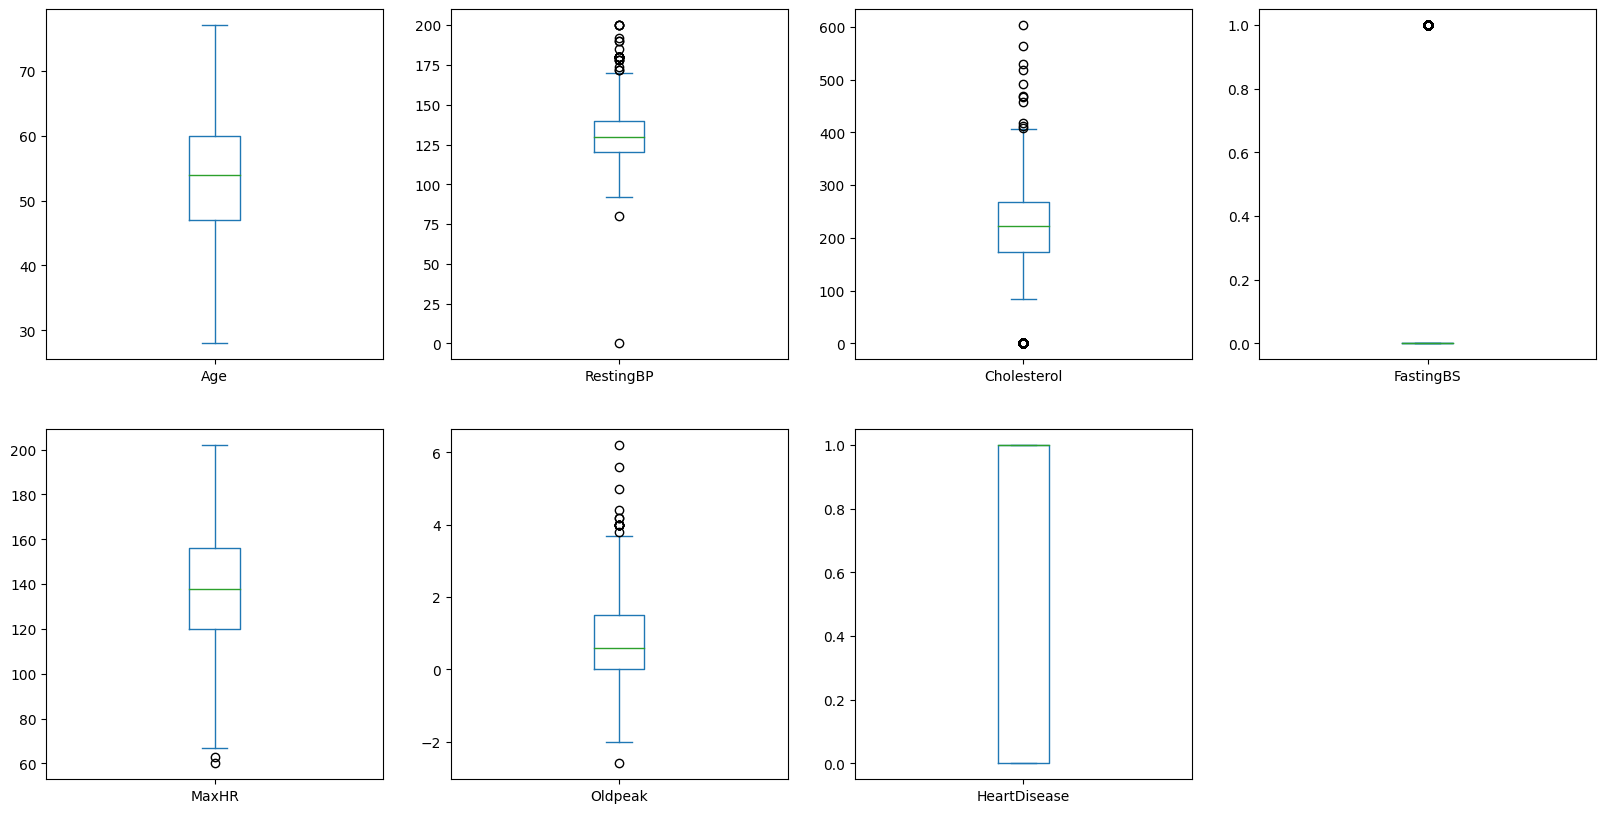

In [11]:
h.plot(kind="box",subplots=True,sharex=False, sharey=False, layout=(2,4), figsize=(20,10) )

***So here we can observe that in RestingBP, Chilestrol, MAxHR and Oldpeak columns outliers are available.***

Age                AxesSubplot(0.125,0.53;0.168478x0.35)
RestingBP       AxesSubplot(0.327174,0.53;0.168478x0.35)
Cholesterol     AxesSubplot(0.529348,0.53;0.168478x0.35)
FastingBS       AxesSubplot(0.731522,0.53;0.168478x0.35)
MaxHR              AxesSubplot(0.125,0.11;0.168478x0.35)
Oldpeak         AxesSubplot(0.327174,0.11;0.168478x0.35)
HeartDisease    AxesSubplot(0.529348,0.11;0.168478x0.35)
dtype: object

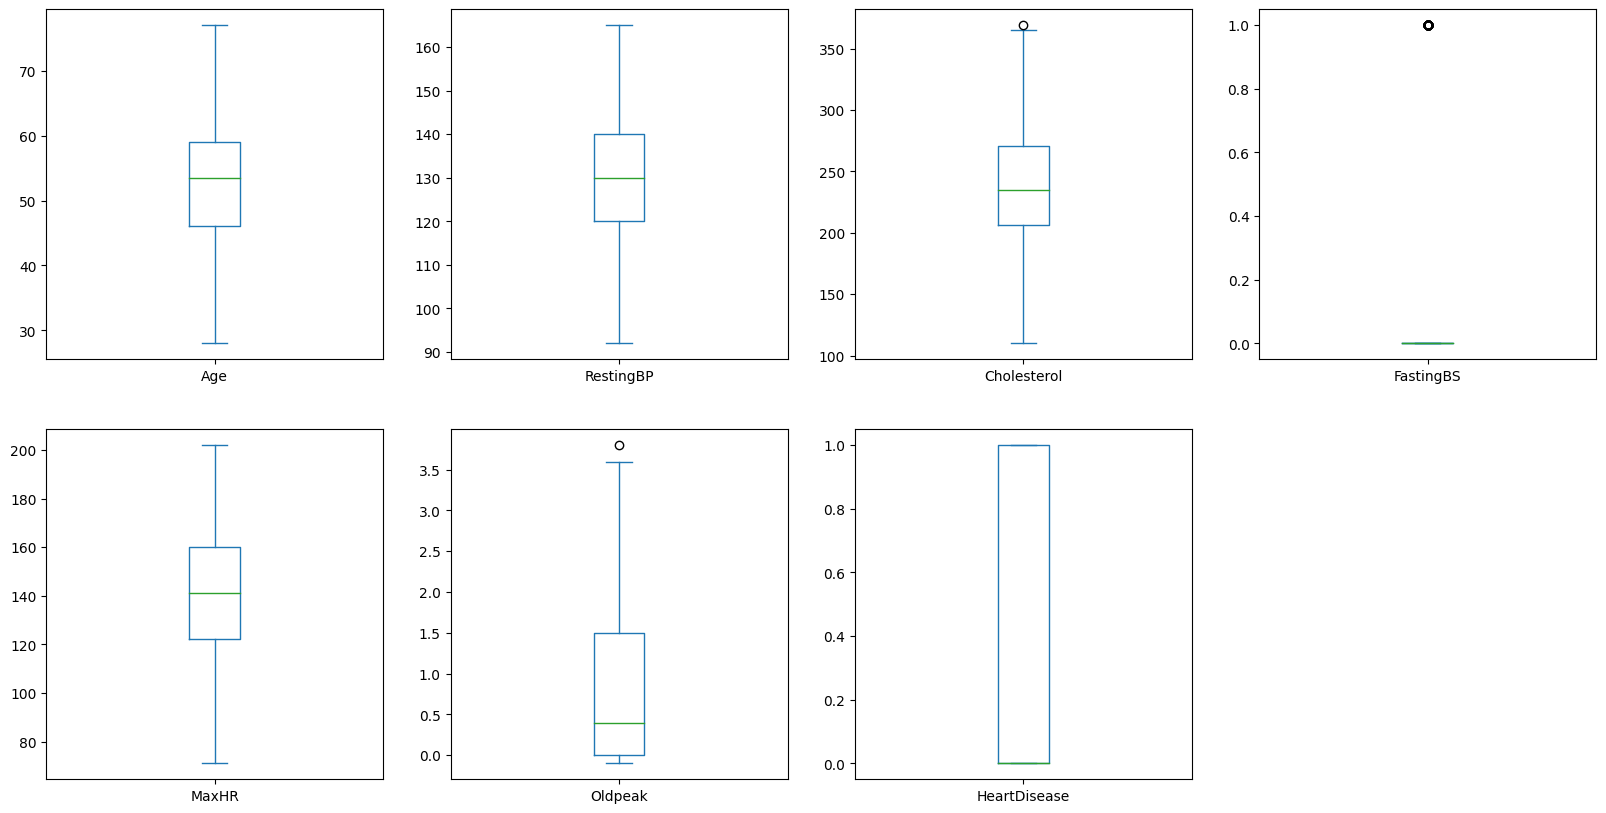

In [12]:
h=h[(h.RestingBP <  170) & (h.RestingBP > 85)]
h=h[(h.Cholesterol <  380) & (h.Cholesterol > 100)]
h=h[h.MaxHR  > 65]
h=h[(h.Oldpeak <  4) & (h.Oldpeak >  -2)]

h.plot(kind="box",subplots=True,sharex=False, sharey=False, layout=(2,4), figsize=(20,10) )

In [13]:
h.shape

(682, 12)

<span style="Algerian:cursive;font-size:25px;color:red;">To Check Multicolliearity 

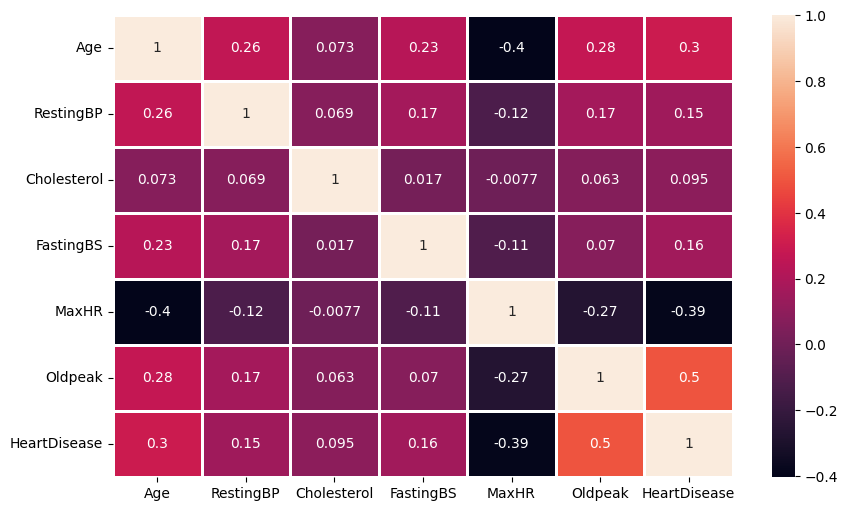

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(h.corr(),annot=True,linewidths=1)
plt.show()

<span style="Algerian:cursive;font-size:25px;color:red;"> Data Visualisation </span>

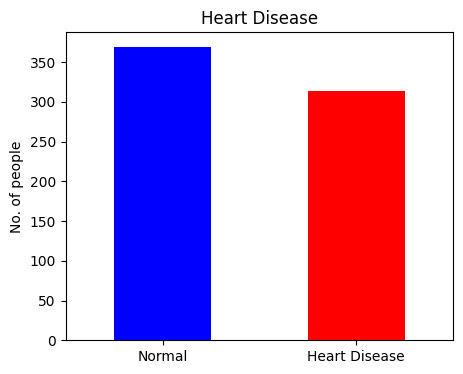

In [15]:
barplot=h["HeartDisease"].value_counts().plot(kind="bar", figsize=(5,4), color=['blue',"red"])
barplot.set_xticklabels(labels=['Normal', "Heart Disease"],rotation=0);
plt.title("Heart Disease")
plt.ylabel("No. of people");
target=h.HeartDisease.value_counts().reset_index()

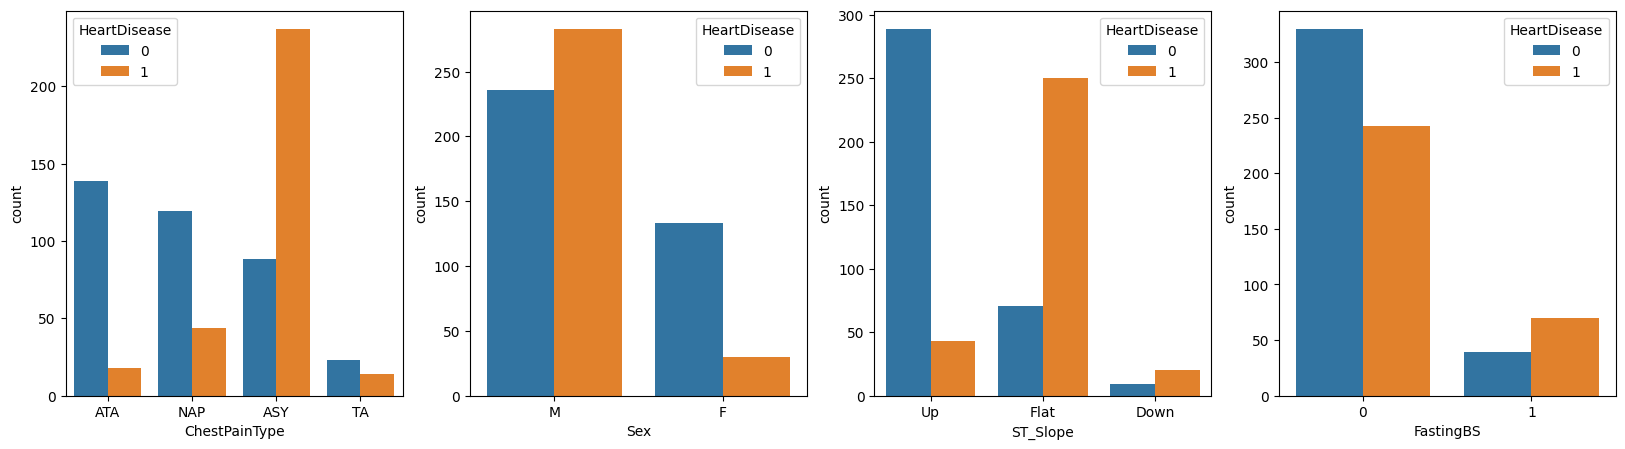

In [16]:
Cat_Col = ["ChestPainType","Sex","ST_Slope","FastingBS"]           #FastingBS = [1: if FastingBS > 120 mg/dl, 0: otherwise

plt.figure(figsize=(20,5))
for i, col in enumerate(Cat_Col):
    plt.subplot(1,4,i+1)  
    sns.countplot(data=h, x=col, hue='HeartDisease')           # 1: heart disease, 0: Normal
    

***From the bar graph, we can observe that most Asymptomatic chest pain type persons have heart disease problem. Among disease patients, male are higher than female. Most of the Flat ST_Slope paitient type have heart disease problem and the most of the heart disease patient FastingBS > 120 mg/dl.***

<AxesSubplot: xlabel='Sex', ylabel='count'>

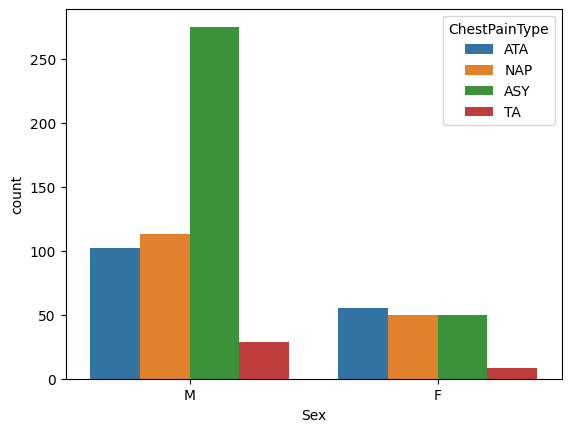

In [17]:
sns.countplot(x="Sex", hue="ChestPainType", data=h) 

***From the bar graph, we can observe that most of the males have Asymptomatic chest pain problem.***

 Minimum Age =  28 
 Maximum Age = 77


Text(0.5, 1.0, 'Age Distribution')

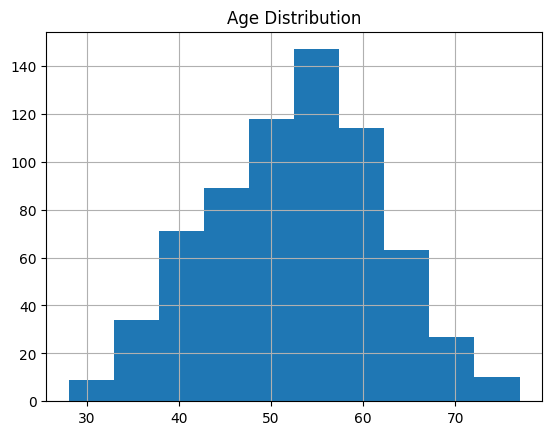

In [18]:
print(" Minimum Age = ",min(h.Age), "\n Maximum Age =",max(h.Age))
h["Age"].hist().plot(kind="bar")
plt.title("Age Distribution")

***Here we can observe that Age are normally distributed. Most of the patients are in the age between 50 to 60. The mean age is about 54 years, the youngest is at 28 and the oldest is at 77.***

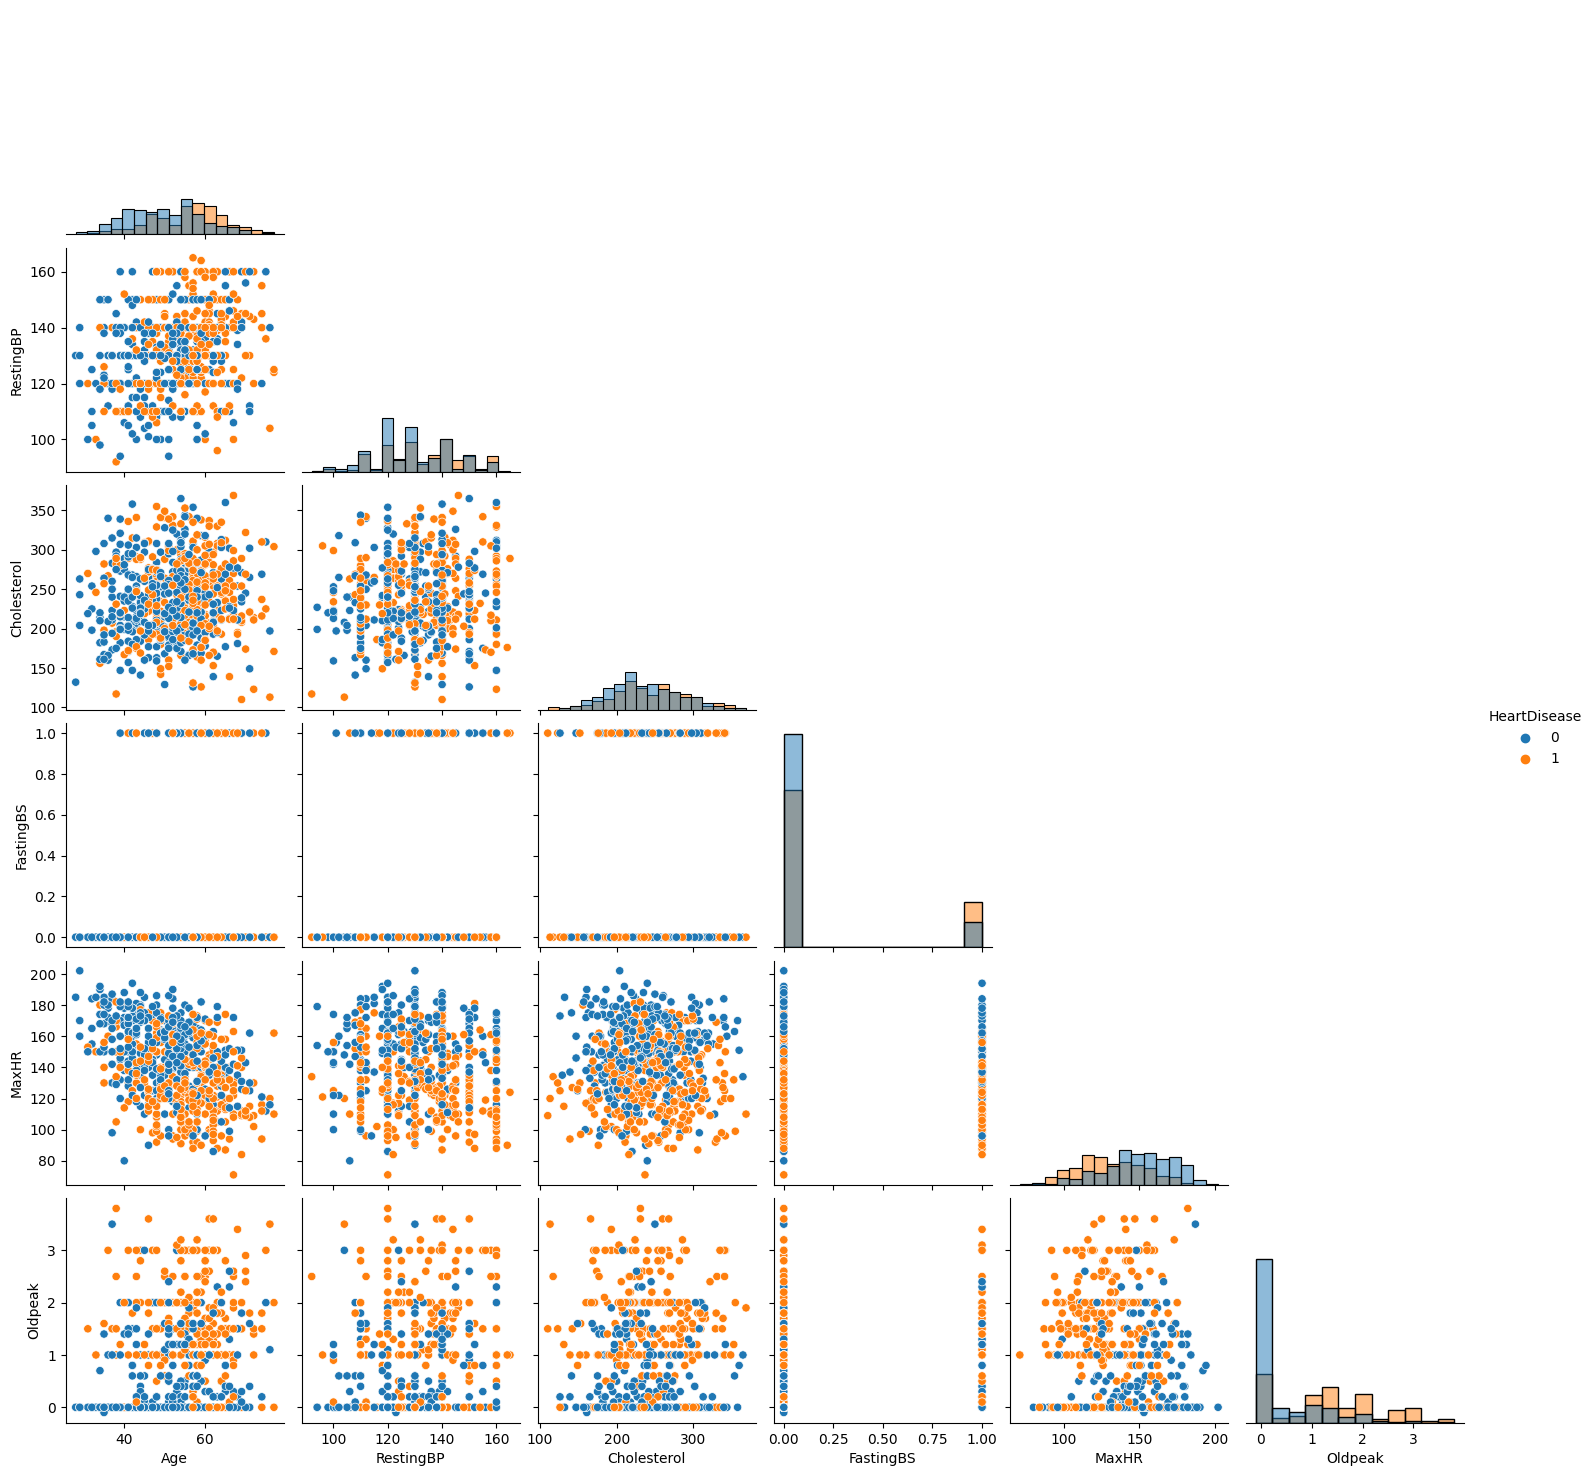

In [19]:
sns.pairplot(h, hue ='HeartDisease',diag_kind='hist',corner=True)

***In the correlation matrix we can observe a strong negative correlation between age and MaxHR***

In [20]:
#To create a list of character columns
lst=[]
for i in h.columns:
    if h[i].dtype == "O":
        lst.append(i)
        
for col in lst:
    print(col)
    print("Number of unique classes :",h[col].unique())
    print('\n')

Sex
Number of unique classes : ['M' 'F']


ChestPainType
Number of unique classes : ['ATA' 'NAP' 'ASY' 'TA']


RestingECG
Number of unique classes : ['Normal' 'ST' 'LVH']


ExerciseAngina
Number of unique classes : ['N' 'Y']


ST_Slope
Number of unique classes : ['Up' 'Flat' 'Down']




In [21]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

for i in lst:
    h[i]=lb.fit_transform(h[i])

In [22]:
print("Sex Unique :",h.Sex.unique())
print("ChestPainType Unique :",h.ChestPainType.unique())
print("RestingECG Unique :",h.RestingECG.unique())
print("ExerciseAngina Unique :",h.ExerciseAngina.unique())
print("ST_Slope Unique :",h.ST_Slope.unique())

Sex Unique : [1 0]
ChestPainType Unique : [1 2 0 3]
RestingECG Unique : [1 2 0]
ExerciseAngina Unique : [0 1]
ST_Slope Unique : [2 1 0]


In [23]:
h.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1


***Now we can see that our data has been completely transformed into numerical dataset.***

<span style="Algerian:cursive;font-size:25px;color:red;">Splittiing Dataset

In [24]:
x=h.drop(columns="HeartDisease")
y=h["HeartDisease"]                        # 0: No Heart Disease     1:Heart Disease

In [25]:
from sklearn.model_selection import train_test_split

,index,HeartDisease
0,0,369
1,1,313


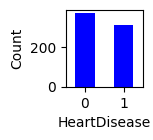

In [26]:
y.value_counts().plot(kind="bar", xlabel="HeartDisease", ylabel="Count", color="blue", rot=0, figsize=(1,1))
y.value_counts().reset_index()

***From above bar graph, we can observe that there is no large difference between heart disease patient. So this dataset 
is balanced.***

# <span style="Algerian:cursive;font-size:25px;color:red;">Model Building

<span style="Algerian:cursive;font-size:25px;color:blue;">1. Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,recall_score

In [28]:
Random_State=[]
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=i)
    model = LogisticRegression()
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    Random_State.append(accuracy_score(y_test,y_pred))
    random_no=(Random_State.index(max(Random_State)))+1
    accuracy=max(Random_State)
print("Random State Number :",random_no,', Accuracy Score :', accuracy)

max_iteration=[]
for i in range(0,1000,20):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=random_no)
    model=LogisticRegression(max_iter=i)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    max_iteration.append(accuracy_score(y_test,y_pred))
    accuracy=max(max_iteration)
print("Maximum iteration Number :",(max_iteration.index(max(max_iteration)))*20, ", Accuracy Score :",accuracy)

Random State Number : 45 , Accuracy Score : 0.927007299270073
Maximum iteration Number : 60 , Accuracy Score : 0.927007299270073


In [29]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=45)

lr_model = LogisticRegression(max_iter=60)
lr_model.fit(x_train,y_train)
y_pred_lr = lr_model.predict(x_test)
df=pd.DataFrame(y_pred_lr,y_test)
print("Table of Predicted and Actual values :\n",df.head(),"\n\n ***********************************************************")
print("Accuracy_score :",accuracy_score(y_test,y_pred_lr),"\n\n ***********************************************************")
print('Confusion_matrix : \n',confusion_matrix(y_test,y_pred_lr),"\n\n ***********************************************************")
print('Precision_Score : \n',precision_score(y_test,y_pred_lr),"\n\n ***********************************************************")
print('Recall_Score : \n',recall_score(y_test,y_pred_lr))

Table of Predicted and Actual values :
               0
HeartDisease   
0             0
0             0
1             1
1             1
1             1 

 ***********************************************************
Accuracy_score : 0.927007299270073 

 ***********************************************************
Confusion_matrix : 
 [[67  5]
 [ 5 60]] 

 ***********************************************************
Precision_Score : 
 0.9230769230769231 

 ***********************************************************
Recall_Score : 
 0.9230769230769231


<span style="Algerian:cursive;font-size:25px;color:blue;">2. Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
Random_State=[]
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=i)
    model_1 = DecisionTreeClassifier(max_features="sqrt", random_state=15, max_leaf_nodes=8,class_weight="balanced")
    model_1.fit(x_train,y_train)
    y_pred_1 = model_1.predict(x_test)
    Random_State.append(accuracy_score(y_test,y_pred_1))
    random_no=(Random_State.index(max(Random_State)))+1
    accuracy=max(Random_State)
print("Random State Number :",random_no,', Accuracy Score :', accuracy)

maximum_depth=[]
for k in range(1,15):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=random_no)
    model=DecisionTreeClassifier(max_depth=k,max_features="sqrt", random_state=15, max_leaf_nodes=8,class_weight="balanced")
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    maximum_depth.append(accuracy_score(y_test,y_pred))
    accuracy=max(maximum_depth)
print("Maximum Depth :",(maximum_depth.index(max(maximum_depth))+1), ", Accuracy Score :",accuracy)

Random State Number : 86 , Accuracy Score : 0.8540145985401459
Maximum Depth : 5 , Accuracy Score : 0.8540145985401459


In [32]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=86)

dt_model = DecisionTreeClassifier(max_depth=8,max_features="sqrt", random_state=15, max_leaf_nodes=8,class_weight="balanced")
dt_model.fit(x_train,y_train)
y_pred = dt_model.predict(x_test)
df=pd.DataFrame(y_pred,y_test)
print("Table of Predicted and Actual values :\n",df.head(),"\n\n ***********************************************************")
print("Accuracy_score :",accuracy_score(y_test,y_pred),"\n\n ***********************************************************")
print('Confusion_matrix : \n',confusion_matrix(y_test,y_pred),"\n\n ***********************************************************")
print('Precision_Score : \n',precision_score(y_test,y_pred),"\n\n ***********************************************************")
print('Recall_Score : \n',recall_score(y_test,y_pred))

Table of Predicted and Actual values :
               0
HeartDisease   
1             1
1             1
0             0
0             0
0             0 

 ***********************************************************
Accuracy_score : 0.8540145985401459 

 ***********************************************************
Confusion_matrix : 
 [[69  9]
 [11 48]] 

 ***********************************************************
Precision_Score : 
 0.8421052631578947 

 ***********************************************************
Recall_Score : 
 0.8135593220338984


In [33]:
from sklearn import tree
from sklearn.tree import plot_tree

h["HeartDisease"].unique()     

array([0, 1], dtype=int64)

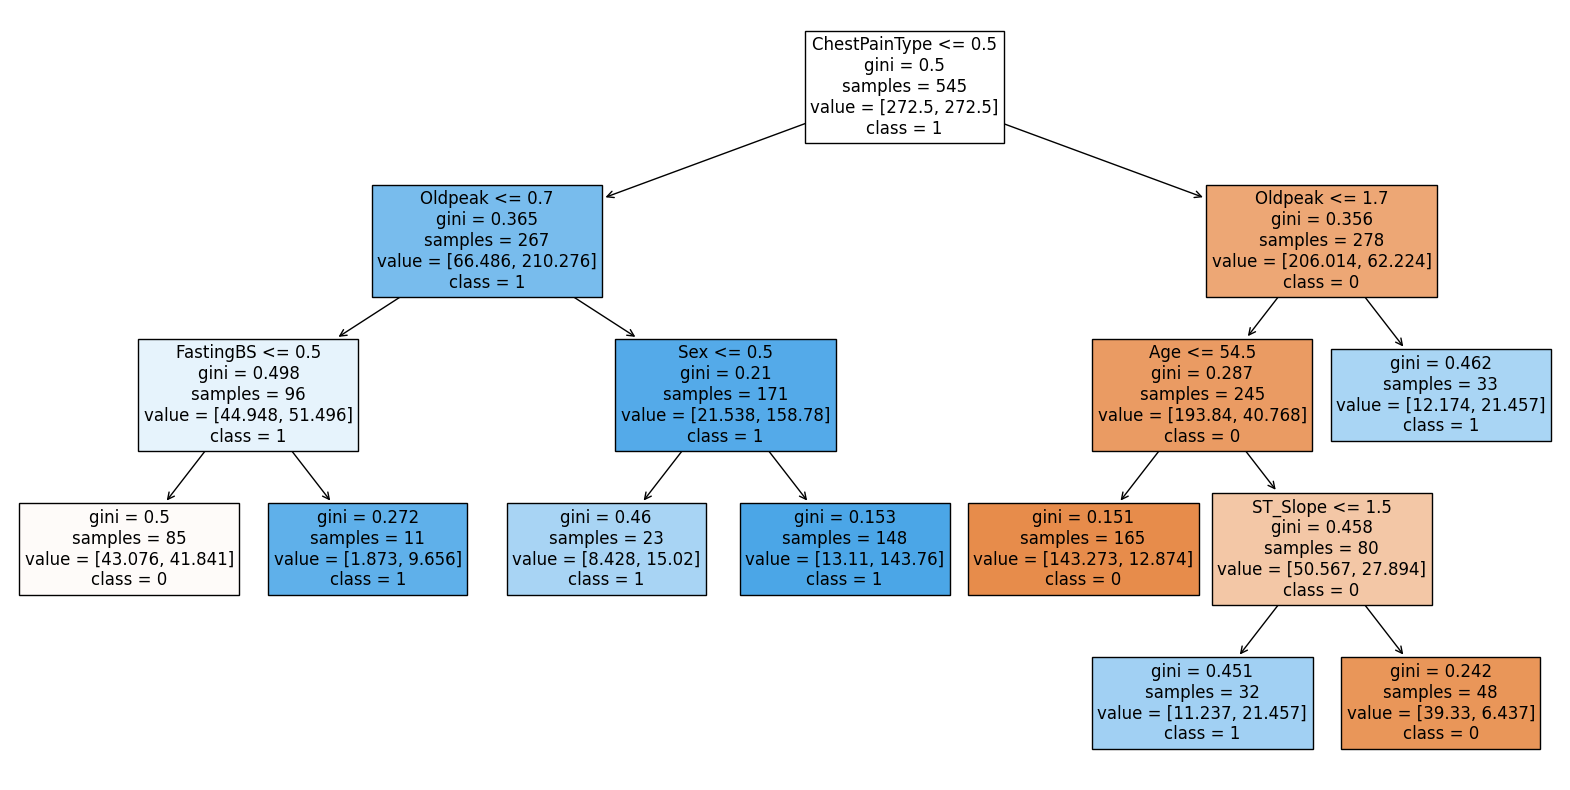

In [34]:
plt.figure(figsize=(20,10))
a=plot_tree(dt_model,fontsize=12,feature_names=x.columns,class_names=["0","1"],filled=True)
plt.show()

<span style="Algerian:cursive;font-size:25px;color:blue;">3. Random Forest Classifier

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
Random_State=[]
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=i)
    model_1 = RandomForestClassifier(max_leaf_nodes=8,n_jobs=6,random_state=20,class_weight="balanced",max_samples=30)
    model_1.fit(x_train,y_train)
    y_pred_1 = model_1.predict(x_test)
    Random_State.append(accuracy_score(y_test,y_pred_1))
    random_no=(Random_State.index(max(Random_State)))+1
    accuracy=max(Random_State)
print("Random State Number :",random_no,', Accuracy Score :', accuracy)

maximum_depth=[]
for k in range(2,20):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=random_no)
    model=RandomForestClassifier(max_depth=k,max_leaf_nodes=8,n_jobs=6,random_state=20,class_weight="balanced",max_samples=30)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    maximum_depth.append(accuracy_score(y_test,y_pred))
    accuracy=max(maximum_depth)
print("Maximum Depth :",(maximum_depth.index(max(maximum_depth))+2), ", Accuracy Score :",accuracy)

Random State Number : 45 , Accuracy Score : 0.948905109489051
Maximum Depth : 2 , Accuracy Score : 0.9562043795620438


In [37]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=45)
rf_model = RandomForestClassifier(max_depth=10,max_leaf_nodes=8,n_jobs=6,random_state=20,class_weight="balanced",max_samples=30)
rf_model.fit(x_train,y_train)
y_pred = rf_model.predict(x_test)
df=pd.DataFrame(y_pred,y_test)
print("Table of Predicted and Actual values :\n",df.head(),"\n\n ***********************************************************")
print("Accuracy_score :",accuracy_score(y_test,y_pred),"\n\n ***********************************************************")
print('Confusion_matrix : \n',confusion_matrix(y_test,y_pred),"\n\n ***********************************************************")
print('Precision_Score : \n',precision_score(y_test,y_pred),"\n\n ***********************************************************")
print('Recall_Score : \n',recall_score(y_test,y_pred))

Table of Predicted and Actual values :
               0
HeartDisease   
0             0
0             0
1             1
1             1
1             1 

 ***********************************************************
Accuracy_score : 0.948905109489051 

 ***********************************************************
Confusion_matrix : 
 [[68  4]
 [ 3 62]] 

 ***********************************************************
Precision_Score : 
 0.9393939393939394 

 ***********************************************************
Recall_Score : 
 0.9538461538461539


<span style="Algerian:cursive;font-size:25px;color:blue;"> 4. KNN Algorithm

In [38]:
from sklearn.neighbors import KNeighborsClassifier

Random State Number : 49 , Accuracy Score : 0.7664233576642335
Maximum K_Neighbours : 5 , Accuracy Score : 0.7664233576642335


Text(0.5, 1.0, 'K Neighbours Classifier for different K values')

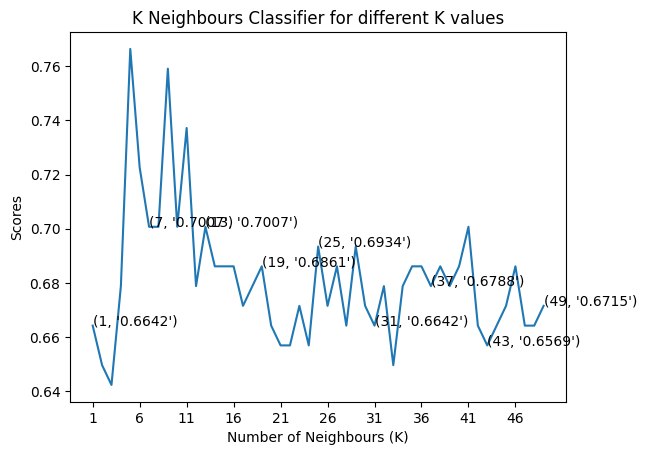

In [39]:
Random_State=[]
for j in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=j)
    knn=KNeighborsClassifier()
    knn.fit(x_train , y_train)
    y_pred = knn.predict(x_test)
    Random_State.append(accuracy_score(y_test,y_pred))
    random_no=(Random_State.index(max(Random_State)))+1
    accuracy=max(Random_State)
print("Random State Number :",random_no,', Accuracy Score :', accuracy)

K_Neighbours=[]
for k in range(5,50,2):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=random_no)
    model=KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    K_Neighbours.append(accuracy_score(y_test,y_pred))
    accuracy=max(K_Neighbours)
print("Maximum K_Neighbours :",(K_Neighbours.index(max(K_Neighbours))*2+5), ", Accuracy Score :",accuracy)

#Graph Code for KNN
knn_scores=[]
for k in range(1,50):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train , y_train)
    y_prediction=knn.predict(x_test)
    knn_scores.append(accuracy_score(y_test,y_prediction))

plt.plot([k for k in range(1,50)],knn_scores)
for i in range(1,50,6):
    plt.text(i,knn_scores[i-1],(i,'%.4f'%knn_scores[i-1]))
plt.xticks([i for i in range(1,50,5)])
plt.xlabel('Number of Neighbours (K)')
plt.ylabel('Scores')
plt.title("K Neighbours Classifier for different K values")

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=49)

knn_model=KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train , y_train)
y_pred = knn_model.predict(x_test)
df=pd.DataFrame(y_pred,y_test)
print("Table of Predicted and Actual values :\n",df.head(),"\n\n ***********************************************************")
print("Accuracy_score :",accuracy_score(y_test,y_pred),"\n\n ***********************************************************")
print('Confusion_matrix : \n',confusion_matrix(y_test,y_pred),"\n\n ***********************************************************")
print('Precision_Score : \n',precision_score(y_test,y_pred),"\n\n ***********************************************************")
print('Recall_Score : \n',recall_score(y_test,y_pred))

Table of Predicted and Actual values :
               0
HeartDisease   
1             1
0             0
0             1
0             0
0             0 

 ***********************************************************
Accuracy_score : 0.7664233576642335 

 ***********************************************************
Confusion_matrix : 
 [[55 12]
 [20 50]] 

 ***********************************************************
Precision_Score : 
 0.8064516129032258 

 ***********************************************************
Recall_Score : 
 0.7142857142857143


<span style="Algerian:cursive;font-size:25px;color:blue;"> 5. Naive Baye's Algorithm

In [41]:
from sklearn.naive_bayes import GaussianNB

In [42]:
Random_State=[]
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=i)
    model=GaussianNB()
    model.fit(x_train , y_train)
    y_pred = model.predict(x_test)
    Random_State.append(accuracy_score(y_test,y_pred))
    random_no=(Random_State.index(max(Random_State)))+1
    accuracy=max(Random_State)
print("Random State Number :",random_no,', Accuracy Score :', accuracy)

Random State Number : 45 , Accuracy Score : 0.927007299270073


In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=45)

nb_model=GaussianNB()
nb_model.fit(x_train , y_train)
y_pred = nb_model.predict(x_test)
df=pd.DataFrame(y_pred,y_test)
print("Table of Predicted and Actual values :\n",df.head(),"\n\n ***********************************************************")
print("Accuracy_score :",accuracy_score(y_test,y_pred),"\n\n ***********************************************************")
print('Confusion_matrix : \n',confusion_matrix(y_test,y_pred),"\n\n ***********************************************************")
print('Precision_Score : \n',precision_score(y_test,y_pred),"\n\n ***********************************************************")
print('Recall_Score : \n',recall_score(y_test,y_pred))

Table of Predicted and Actual values :
               0
HeartDisease   
0             0
0             0
1             1
1             1
1             1 

 ***********************************************************
Accuracy_score : 0.927007299270073 

 ***********************************************************
Confusion_matrix : 
 [[66  6]
 [ 4 61]] 

 ***********************************************************
Precision_Score : 
 0.9104477611940298 

 ***********************************************************
Recall_Score : 
 0.9384615384615385


<span style="Algerian:cursive;font-size:25px;color:blue;"> 6. Support Vector Machine

In [44]:
from sklearn.svm import SVC

In [45]:
Random_State=[]
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=i)
    model=SVC()
    model.fit(x_train , y_train)
    y_pred = model.predict(x_test)
    Random_State.append(accuracy_score(y_test,y_pred))
    random_no=(Random_State.index(max(Random_State)))+1
    accuracy=max(Random_State)
print("Random State Number :",random_no,', Accuracy Score :', accuracy)

Random State Number : 53 , Accuracy Score : 0.7664233576642335


In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=53)

svm_model=SVC()
svm_model.fit(x_train , y_train)
y_pred = svm_model.predict(x_test)
df=pd.DataFrame(y_pred,y_test)
print("Table of Predicted and Actual values :\n",df.head(),"\n\n ***********************************************************")
print("Accuracy_score :",accuracy_score(y_test,y_pred),"\n\n ***********************************************************")
print('Confusion_matrix : \n',confusion_matrix(y_test,y_pred),"\n\n ***********************************************************")
print('Precision_Score : \n',precision_score(y_test,y_pred),"\n\n ***********************************************************")
print('Recall_Score : \n',recall_score(y_test,y_pred))

Table of Predicted and Actual values :
               0
HeartDisease   
1             1
0             0
1             1
1             1
0             0 

 ***********************************************************
Accuracy_score : 0.7664233576642335 

 ***********************************************************
Confusion_matrix : 
 [[55 13]
 [19 50]] 

 ***********************************************************
Precision_Score : 
 0.7936507936507936 

 ***********************************************************
Recall_Score : 
 0.7246376811594203


<span style="Algerian:cursive;font-size:25px;color:blue;"> 7. Gradient Boosting

In [47]:
from sklearn.ensemble import GradientBoostingClassifier

In [49]:
Random_State=[]
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=i)
    model=GradientBoostingClassifier()
    model.fit(x_train , y_train)
    y_pred = model.predict(x_test)
    Random_State.append(accuracy_score(y_test,y_pred))
    random_no=(Random_State.index(max(Random_State)))+1
    accuracy=max(Random_State)
print("Random State Number :",random_no,', Accuracy Score :', accuracy)

Random State Number : 82 , Accuracy Score : 0.9343065693430657


In [50]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=82)

gb_model=GradientBoostingClassifier()
gb_model.fit(x_train , y_train)
y_pred = gb_model.predict(x_test)
df=pd.DataFrame(y_pred,y_test)
print("Table of Predicted and Actual values :\n",df.head(),"\n\n ***********************************************************")
print("Accuracy_score :",accuracy_score(y_test,y_pred),"\n\n ***********************************************************")
print('Confusion_matrix : \n',confusion_matrix(y_test,y_pred),"\n\n ***********************************************************")
print('Precision_Score : \n',precision_score(y_test,y_pred),"\n\n ***********************************************************")
print('Recall_Score : \n',recall_score(y_test,y_pred))

Table of Predicted and Actual values :
               0
HeartDisease   
1             1
1             1
0             0
1             1
0             0 

 ***********************************************************
Accuracy_score : 0.9343065693430657 

 ***********************************************************
Confusion_matrix : 
 [[63  5]
 [ 4 65]] 

 ***********************************************************
Precision_Score : 
 0.9285714285714286 

 ***********************************************************
Recall_Score : 
 0.9420289855072463


# <span style="Algerian:cursive;font-size:25px;color:red;"> Conclusion

In [51]:
data={
    "Algorithms" : ["Logistic Regression", "Decision Tree", "Random Forest Classifier", "KNN Algorithm", "Naive Baye's", "SVM Algorithm", "Gradient Boosting" ],
    "Accuracy" : [0.927007299270073, 0.8540145985401459, 0.948905109489051, 0.7664233576642335, 0.927007299270073, 0.7664233576642335, 0.9343065693430657],
    "Precision" : [0.9230769230769231, 0.8421052631578947,  0.9393939393939394, 0.8064516129032258, 0.9104477611940298, 0.7936507936507936, 0.9285714285714286],
    "Recall" : [0.9230769230769231, 0.8135593220338984, 0.9538461538461539, 0.7142857142857143, 0.9384615384615385, 0.7246376811594203, 0.9420289855072463] 
}

df=pd.DataFrame(data)
df

,Algorithms,Accuracy,Precision,Recall
0,Logistic Regression,0.927007,0.923077,0.923077
1,Decision Tree,0.854015,0.842105,0.813559
2,Random Forest Classifier,0.948905,0.939394,0.953846
3,KNN Algorithm,0.766423,0.806452,0.714286
4,Naive Baye's,0.927007,0.910448,0.938462
5,SVM Algorithm,0.766423,0.793651,0.724638
6,Gradient Boosting,0.934307,0.928571,0.942029


Text(0.5, 1.0, 'Algorithms v/s Scores')

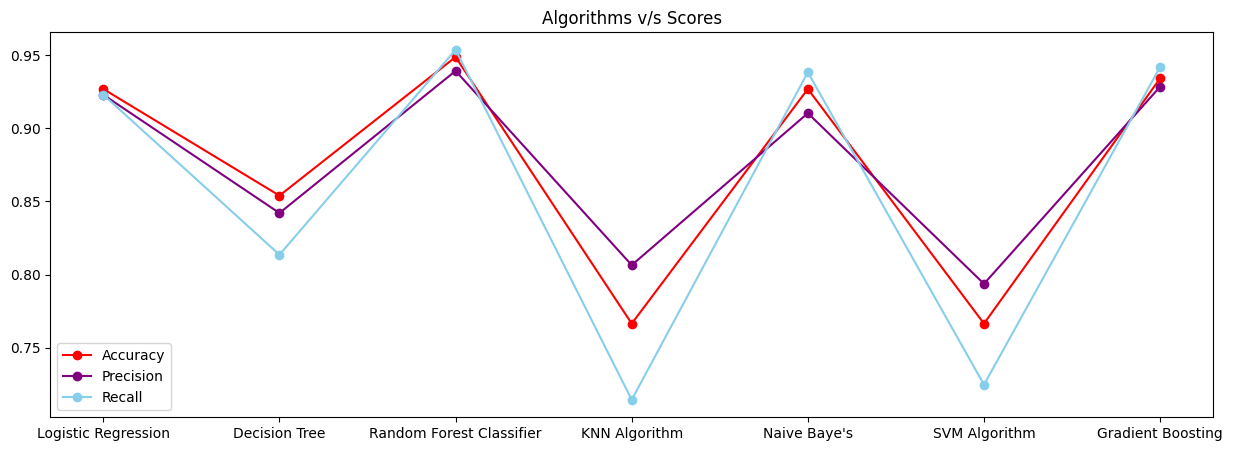

In [52]:
plt.figure(figsize=(15,5))
plt.plot(df["Algorithms"],df["Accuracy"],"red",label="Accuracy",marker="o")
plt.plot(df["Algorithms"],df["Precision"],"purple",label="Precision",marker="o")
plt.plot(df["Algorithms"],df["Recall"],"skyblue",label="Recall",marker="o")
plt.legend()
plt.title("Algorithms v/s Scores")

 ***So here, Random Forest Classifier gives highest Accuracy (94.89%)  also there precision(93.93%) and recall(95.38%) are highest as compare to other algorithms. So we use Gradient Boosting Algorithms for this dataset.***

# <span style="Algerian:cursive;font-size:25px;color:red;"> Find Important Features Using Random Forest Classifier

<AxesSubplot: >

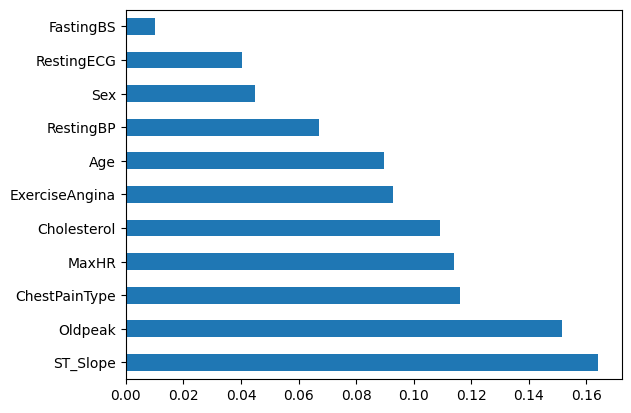

In [53]:
(pd.Series(rf_model.feature_importances_, index=x.columns)).nlargest(11).plot(kind="barh")

In [54]:
h.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

***From above graph we can observe that ST_Slope, Oldpeak, ChestPainType, MaxHR, Cholesterol, ExerciseAngina, Age and  RestingBP are important features.***

***<span style="Algerian:cursive;font-size:16px;color:Blue;">Now find accuracy using that features in Random Forest Algorithm***

In [55]:
x=h[['Age', 'ChestPainType' , 'RestingBP' , 'Cholesterol' , 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']]
y=h.HeartDisease

In [56]:
Random_State=[]
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=i)
    model_1 = RandomForestClassifier(max_leaf_nodes=8,n_jobs=6,random_state=20,class_weight="balanced",max_samples=30)
    model_1.fit(x_train,y_train)
    y_pred_1 = model_1.predict(x_test)
    Random_State.append(accuracy_score(y_test,y_pred_1))
    random_no=(Random_State.index(max(Random_State)))+1
    accuracy=max(Random_State)
print("Random State Number :",random_no,', Accuracy Score :', accuracy)

maximum_depth=[]
for k in range(2,20):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=random_no)
    model=RandomForestClassifier(max_depth=k,max_leaf_nodes=8,n_jobs=6,random_state=20,class_weight="balanced",max_samples=30)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    maximum_depth.append(accuracy_score(y_test,y_pred))
    accuracy=max(maximum_depth)
print("Maximum Depth :",(maximum_depth.index(max(maximum_depth))+2), ", Accuracy Score :",accuracy)

Random State Number : 86 , Accuracy Score : 0.9343065693430657
Maximum Depth : 7 , Accuracy Score : 0.9343065693430657


In [57]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=86)
rf_model = RandomForestClassifier(max_depth=7,max_leaf_nodes=8,n_jobs=6,random_state=20,class_weight="balanced",max_samples=30)
rf_model.fit(x_train,y_train)
y_pred = rf_model.predict(x_test)
df=pd.DataFrame(y_pred,y_test)
print("Table of Predicted and Actual values :\n",df.head(),"\n\n ***********************************************************")
print("Accuracy_score :",accuracy_score(y_test,y_pred),"\n\n ***********************************************************")
print('Confusion_matrix : \n',confusion_matrix(y_test,y_pred),"\n\n ***********************************************************")
print('Precision_Score : \n',precision_score(y_test,y_pred),"\n\n ***********************************************************")
print('Recall_Score : \n',recall_score(y_test,y_pred))

Table of Predicted and Actual values :
               0
HeartDisease   
1             1
1             1
0             0
0             0
0             0 

 ***********************************************************
Accuracy_score : 0.9343065693430657 

 ***********************************************************
Confusion_matrix : 
 [[77  1]
 [ 8 51]] 

 ***********************************************************
Precision_Score : 
 0.9807692307692307 

 ***********************************************************
Recall_Score : 
 0.864406779661017


In [58]:
tab=pd.DataFrame()
tab["Actual_Heart_Disease_Value"]=y_test
tab["Predected_Heart_Disease_Value"]=y_pred
tab.head()

,Actual_Heart_Disease_Value,Predected_Heart_Disease_Value
74,1,1
674,1,1
821,0,0
906,0,0
151,0,0


# <span style="Algerian:cursive;font-size:35px;color:SkyBlue;">Save The Model

In [68]:
import pickle
filename = "C:\\Users\\LENOVO\\Kalyani\\Documents\\Model_Saving\\Save_Heart_Failure_Prediction_Model.sav"
pickle.dump(rf_model,open(filename,"wb"))

# <span style="Algerian:cursive;font-size:35px;color:SkyBlue;">Load the Model

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pickle
load_model = pickle.load(open("C:\\Users\\LENOVO\\Kalyani\\Documents\\Model_Saving\\Save_Heart_Failure_Prediction_Model.sav","rb"))

In [2]:
Age =int(input("\n Age of the patient [in years]: "))
ChestPainType=int(input("\n Chest Pain Type [3: Typical Angina, 1: Atypical Angina, 2: Non-Anginal Pain, 0: Asymptomatic] : "))
RestingBP =float(input("\n Resting blood pressure [mm Hg] : "))
Cholesterol=float(input("\n Serum cholesterol [mm/dl] : "))
MaxHR=float(input("\n Maximum Heart Rate Achieved [Numeric value between 60 and 202] : "))
ExerciseAngina=int(input("\n Exercise-Induced Angina [1: Yes, 0: No] : "))
Oldpeak=float(input("\n oldpeak = ST [Numeric value measured in depression] :"))
ST_Slope=int(input("\n The slope of the peak exercise ST segment [2: upsloping, 1: flat, 0: downsloping] :"))

m=load_model.predict([[Age,ChestPainType,RestingBP,Cholesterol,MaxHR,ExerciseAngina,Oldpeak,ST_Slope]])

if(m==0):
    print("\n\n         ✨🎉......CONGRATULATIONS......CONGRATULATIONS......CONGRATULATIONS......CONGRATULATIONS......CONGRATULATIONS......🎉✨\n           You have No Heart Disease.")
else:
    print("\n\n          😔......ALERT......ALERT......ALERT......ALERT......ALERT......😔\n          You have a Heart Disease. Pease take care of yourself & take proper treatment.")


 Age of the patient [in years]: 55

 Chest Pain Type [3: Typical Angina, 1: Atypical Angina, 2: Non-Anginal Pain, 0: Asymptomatic] : 0

 Resting blood pressure [mm Hg] : 140

 Serum cholesterol [mm/dl] : 268

 Maximum Heart Rate Achieved [Numeric value between 60 and 202] : 128

 Exercise-Induced Angina [1: Yes, 0: No] : 1

 oldpeak = ST [Numeric value measured in depression] :1.5

 The slope of the peak exercise ST segment [2: upsloping, 1: flat, 0: downsloping] :1


          😔......ALERT......ALERT......ALERT......ALERT......ALERT......😔
          You have a Heart Disease. Pease take care of yourself & take proper treatment.


In [62]:
x_test.head()

,Age,ChestPainType,RestingBP,Cholesterol,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
74,55,0,140,268,128,1,1.5,1
674,62,1,120,281,103,0,1.4,1
821,60,2,102,318,160,0,0.0,2
906,55,1,132,342,166,0,1.2,2
151,48,1,100,159,100,0,0.0,2
